In [1]:
import numpy as np
from numpy import random as rando
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
import os

# Mathematical Modeling by Linear Algebra 
# #1-2: Exercise 5.8. 
(This problem was assigned in the last set of homework. You are
asked to read my solution and redo this problem with my csv data from Canvas and with
your improved R codes with your own style. Again, this problem is long and is considered
as two problems): The monthly dataset is NOAAGlobalT.csv , which is in the data.zip
file posted on the Canvas for this assignment. You need to extract the data for the Pacific
region first, and then convert the monthly data in annual data. Then you can apply the
SVD command. You can use the long R code I sent you as a reference.

# Mathematical Modeling by Calculus

# #3: 6.1
Suppose that the greenhouse effect results in a net energy gain of the Earth’s surface
by $1.0 Wm^{-2}$.

If the gained heat is all used to heat the Earth’s atmosphere, how many
years will be needed to warm the Earth’s entire atmosphere by 1.0
◦C? If the heat is all used
to heat the Earth’s surface water, including the water in the oceans, lakes, and rivers, how
many years will it take to warm the water by 1.0
◦C? Make comments about this study’s
implications for global warming.

Hint: You can find the relevant information about the Earth’s atmosphere and water in
this book or from the Internet.


Avg. temp of atmopsphere = 15 degrees celcius

heat capacity of ocean: 4.18 J/g*C

heat capacity of air: 1.012 J/g*C


# #4: 6.5

Repeat Elisha Mitchell’s calculation with the current data you can find online, such
as the North Carolina Climate Office NC ECONet, and make your own estimation of the
elevation of Mount Mitchell using the hypsometric equation

Data retrieved from https://econet.climate.ncsu.edu/https://econet.climate.ncsu.edu/

MITC - Mount Mitchell State Park:

    Temp: 50.2 F, 283.26K

    Pressure: 804.5mb

    Elevation: 6215 ft. above sea level

Burnsville Tower:

    Temp: 63.3 F, 293.53K

    Pressure: 913.5mb

    Elevation: 2689 ft. above sea level, 819.60m

Hypsometric equation:

$$z_{2} = z_{1} + \frac{2RT_{1}T_{2}}{g(T_{1}+T_{2})} \times ln(\frac{p_{1}}{p_{2}})$$

$R = 287 \frac{J}{kg*K}$

$g = 9.80665$

Plugging values into equation:

$$z_{2} = 819.6 + \frac{2 \times 287.055 \times (293.53)(283.26)}{9.80665(293.53+283.26)} \times ln \left(\frac{913.5mb}{804.5mb}\right)$$

In [17]:
#Calculate height of Mount Mitchell with Hypsometric equation
z1 = 819.6
R = 287.055
T1 = 293.53
T2 = 283.26
g = 9.80665
p1 = 913.15
p2 = 804.5

z2 = z1 + ((2*R*T1*T2)/(g*(T2+T1))) * np.log(p1/p2)
print(f"{np.round(z2/0.3048,0)} ft.")

6196.0 ft.


# #5: 6.6

Calculate the elevation of a high mountain peak near your location, or in another
place with which you are familiar, using observed data and the hypsometric equation.

Mt. Whitney:

    Temp: 69 F, 293.706K

    Pressure: 529 mmHg, 705.275mb

    Elevation: 11494 ft
    
Springville, CA weather station: 34.2 miles SSW of Mt. Whitney

    Temp: 82 F, 300.928K
    
    Pressure: 1012 mb
    
    Elevation: 1024 ft, 312.11m

Plugging in values:

$$z_{2} = 312.11 + \frac{2 \times 287.055 \times (300.928)(293.706)}{9.80665(300.928+293.706)} \times ln \left(\frac{1012}{705.275}\right)$$

In [9]:
#Calculate height of Mt. Whitney with Hypsometric equation
z1 = 312.11
R = 287.055
T1 = 300.928
T2 = 293.706
g = 9.80665
p1 = 1012
p2 = 705.275

z2 = z1 + ((2*R*T1*T2)/(g*(T2+T1))) * np.log(p1/p2)
print(f"{np.round(z2/0.3048,0)} ft.")

11333.0 ft.


# #6: 6.7

a) Under the assumptions of isothermal layer and ideal gas, derive the equation of
exponential decay of pressure with respect to altitude, using the calculus method:
cut a small piece of air of thickness equal to dz and base area equal to A, as
shown in Figure 6.7, and then integrate all the small pieces together. Start with
the balance of forces on this small piece of air and derive a differential equation
model.

(6.55) hypsometric equation = 

$$dp = p(z+dz) - p(z) = -\rho gdz$$ 

(6.56) ideal gas law = 

$$pV = nRT$$ 

In terms of the specific gas constant, the ideal gas law can be written as:


$$pV = nMRT$$

Or, 

$$\frac{nM}{V} = \frac{p}{RT}$$

Here,

$$\rho = \frac{p}{RT}$$

Subbing into 6.55

$$dp = \frac{p}{RT}$$

Or,

$$\frac{1}{p}dp = - Fdz$$

Integrate both sides from elevation $z_{1}$, corresponding to a pressure $p_{1}$, to another elevation $z_{2}$ with a pressure $p_{2}$.

$$\int_{p_{1}}^{p_{2}} \frac{1}{p}dp = \int_{z_{1}}^{z_{2}} -F(z)dz$$

$$ln\left(\frac{p_{2}}{p_{1}} \right) = -\int_{z_{1}}^{z_{2}} F(z)dz$$

$$p_{2} = p_{1} e^{-\int_{z_{1}}^{z_{2}} F(z)dz}$$

The integral can be approximated by 

$$A_{trapezoid} = \frac{F_{1} + F_{2}}{2} \times (z_{2}-z_{1})$$

So,

$$ln\left(\frac{p_{2}}{p_{1}} \right) = -\frac{F_{1} + F_{2}}{2} \times (z_{2}-z_{1})$$

Let,

$$\bar{F} = \frac{F_{1} + F_{2}}{2}$$

Then the equation showing atmospheric pressure decays exponentially with respect to elevation in the atmosphere is

$$p_{2} = p_{1} e^{-\bar{F}(z_{2}-z_{1})}$$

Solve for $z_{2}$

$$z_{2} = z_{1} + \frac{1}{\bar{F}} ln\left(\frac{p_{1}}{p_{2}}\right)$$

Subbing $$F = \frac{g}{TR}$$ and a bunch of algebra we get

$$z_{2} = z_{1} + \frac{2RT_{1}T_{2}}{g(T_{1}+T_{2})} \times ln\left(\frac{p_{1}}{p_{2}}\right)$$

Using the isothermal assumption that the atmospheric layer under consideration has the same temperature everywhere in the layer.

$$T = T_{1} = T_{2}$$

Formula becomes

$$z_{2} = z_{1} + \frac{RT}{g} \times ln\left(\frac{p_{1}}{p_{2}}\right)$$

b) Suppose that (i) an isothermal layer has an average temperature 253K, (ii) the
layer’s bottom is at the sea level with z1 = 0 and p1 = 1000[mb], and (iii) the
isothermal layer’s top pressure is p2 = 500[mb] . Calculate the isothermal layer’s
top coordinate z2 using the formula derived in (a) and using a calculator or R.
Hint: Pay attention to the units of the universal gas constant. Search internet
and find out how many grams of air are equal to one [mol] of air. If certain
conditions are attached to the units conversion, then discuss the conditions and
the numerical results.

In [10]:
z1 = 0
p1 = 1000 #mb
p2 = 500 #mb
R = 287.055 #J(Kg)^-1 K^-1)
T = 253 #K
g = 9.80665 

z2 = np.round(z1 + ((R*T)/g) * np.log(p1/p2),2)
print(f"{z2} meters")

# Mole of air is approximately 28.9 grams

5133.23 meters


# Probability Modeling
# #7: 
(a) State Buffon’s needle problem with text and diagram(s).

French mathematician Georges-Louis Leclerc proposed a geometric probability problem: randomly drop a needle on a floor made of parallel strips of wood, each with the same width. What is the probability that the needle will lie across a line between two strips?

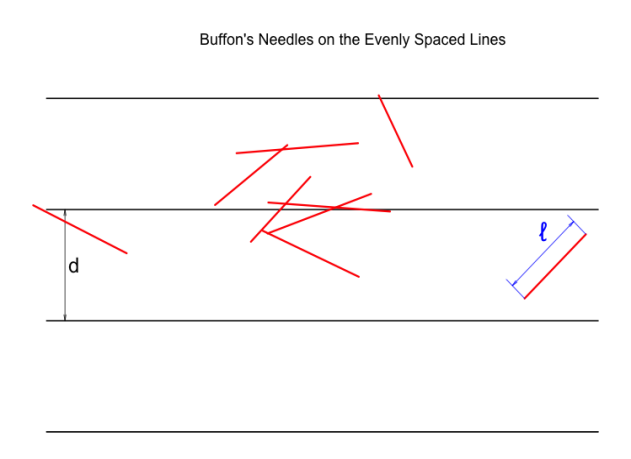

(b) Derive the solution of Buffon’s needle problem when the needle length is longer
than the gap of two lines.

Since $l > d$, the cross must happen when the angle $\theta$ is small enough. The maximum angle $\theta$ for a sure crossing is denoted by $\alpha$ that satisfieds $lcos(\alpha) = d$ which yields

$$\alpha = arcos\left(\frac{d}{l}\right)$$

The area of a sure crossing region is

$$A_{x} = 2\alpha d$$

The area of the conditional crossing region can be found using

$$A_{c} = 2 \int_{\alpha}^{\frac{\pi}{2}} [d-(d-lcos(\theta)]d\theta \\ 
= 2l(1-sin(\alpha) \\
= 2l-2lsin(\alpha)$$

The Pythagorean theorem yields

$$lsin(\alpha) = \sqrt{l^{2}-d^{2}}$$

The probability of the needle crossing is

$$p_{L} = \frac{A_{x} + A_{c}}{A} \\ 
= \frac{1}{\pi d} \times (2\alpha d + 2l - 2\sqrt{l^{2}-d^{2}}$$

Which can be written as a ratio $r = \frac{l}{d}$

$$p_{L} = \frac{2}{\pi} \left[r + arcos\left(\frac{1}{r}\right) - \sqrt{r^{2}-1}\right]$$ 

(c) Write an R program to simulate the above Buffon’s needle problem in (a) and
(b).

# $l < d$

In [11]:
d = 4
l = 2 # Short Needle
n = 10_000
ys = rando.uniform(low=0, high=d, size=(n,1))
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(n,1))
res = ys + l*np.cos(thetas)
k = len(np.where(res >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/n}")
print(f"Probability of Needle Crossing by derived formula: {(2*l)/(np.pi*d)}")

Probability of Needle Crossing by simulation: 0.3129
Probability of Needle Crossing by derived formula: 0.3183098861837907


# $l > d$

In [12]:
d = 2
l = 4 # Long Needle
n = 10_000
ys = rando.uniform(low=0, high=d, size=(n,1))
thetas = rando.uniform(low=-np.pi/2, high=np.pi/2, size=(n,1))
res = ys + l*np.cos(thetas)
k = len(np.where(res >= d)[0])

print(f"Probability of Needle Crossing by simulation: {k/n}")
print(f"Probability of Needle Crossing by derived formula: "
      f"{(2/(np.pi*d))*(np.arccos(d/l)*d + l - np.sqrt(l**2 - d**2))}")

Probability of Needle Crossing by simulation: 0.8382
Probability of Needle Crossing by derived formula: 0.8372484205582454


# #8: 

In [13]:
from scipy.special import gamma

N = 10_000 # Number of simulations
n = 8 # Dimension of ball
x = rando.uniform(low=-1, high=1, size=(N,n))

norms = np.linalg.norm(x, ord=2, axis=1)

k = len(np.where(norms < 1)[0])

print(f"Volume of 8-dimension ball by simulation: {(k/N)*2**n}")
print(f"Volume of 8-dimension ball by formula: {np.pi**(.5*n)/gamma(.5*n + 1)}")

Volume of 8-dimension ball by simulation: 3.8656
Volume of 8-dimension ball by formula: 4.058712126416768


# #9:

In [14]:
x = y = [1, 2, 3, 4, 5, 6]  # Two dice x and y
m = 100000  # Simulate m times
l = 0  # l is used as the counter for a specific event, such as "7"

for i in range(m):
    if rando.choice(x) + rando.choice(y) == 7:
        l += 1
        
print(l/m) # The simulated probability

0.16806


In [15]:
rolls = rando.randint(low=1, high=7, size=(int(1e8),2))
rollSums = rolls[:,0] + rolls[:,1]

place = np.where(rollSums == 7)[0]

print(f"Simulated probability that the sum of 2 dice is 7: "
      f"{place.shape[0]/rollSums.shape[0]:5.4f}")
x = 1/6
print("Calculated probability that the sum of 2 dice is 7: ", 1/6)

Simulated probability that the sum of 2 dice is 7: 0.1666
Calculated probability that the sum of 2 dice is 7:  0.16666666666666666


# #10:

In [16]:
n = 5
N = 10_000
x = rando.uniform(-1, 1, size=(N, n))
ranges = [(0, 1)]*5

y = np.linalg.norm(x, ord=2, axis=1)

inside = np.where(y < 1)[0]

r = (x[inside,0], x[inside,1], x[inside,2], x[inside,3], x[inside,4])

f3 = lambda x1, x2, x3, x4, x5: x1**2 + x2**2 + x3**2 + x4**2 + x5**2

V5 = np.pi**(.5*n)/gamma(.5*n + 1)

print(f"Monte Carlo Integration of f3(x) over D: {V5*np.mean(f3(*r))}")

Monte Carlo Integration of f3(x) over D: 3.801154717219929
